### A/B/C Test Goals and Metrics: Show Me the Money

Based on the dataset's Kaggle description, it appears we're dealing with a classic marketing showdown. The goal? To identify the promotional strategy that rakes in the most cash, of course.

To measure this glorious pursuit of profit, we'll focus on the **mean** `SalesInThousands` for each promotion group.

Let's analyze these numbers and uncover the winning strategy (or expose them all as dismal failures).


In [1]:
import data_utils as f

In [2]:
df = f.pd.read_csv('src/WA_Marketing-Campaign.csv')

In [3]:
f.check_df(df)

############## Shape ##############
(548, 7)
############## Types ##############
MarketID              int64
MarketSize           object
LocationID            int64
AgeOfStore            int64
Promotion             int64
week                  int64
SalesInThousands    float64
dtype: object
############## Head ##############
   MarketID MarketSize  LocationID  AgeOfStore  Promotion  week  SalesInThousands
0         1     Medium           1           4          3     1           33.7300
1         1     Medium           1           4          3     2           35.6700
2         1     Medium           1           4          3     3           29.0300
3         1     Medium           1           4          3     4           39.2500
4         1     Medium           2           5          2     1           27.8100
############## Tail ##############
     MarketID MarketSize  LocationID  AgeOfStore  Promotion  week  SalesInThousands
543        10      Large         919           2          1    


Group column 'Promotion' statistics:

| Promotion   | Count    | Unique_Values   | Ratio   | Total_Count   |
|:------------|:---------|:----------------|:--------|:--------------|
| 1           | 172.0000 | 167.0000        | 0.3139  | 548.0000      |
| 2           | 188.0000 | 184.0000        | 0.3431  | 548.0000      |
| 3           | 188.0000 | 187.0000        | 0.3431  | 548.0000      |


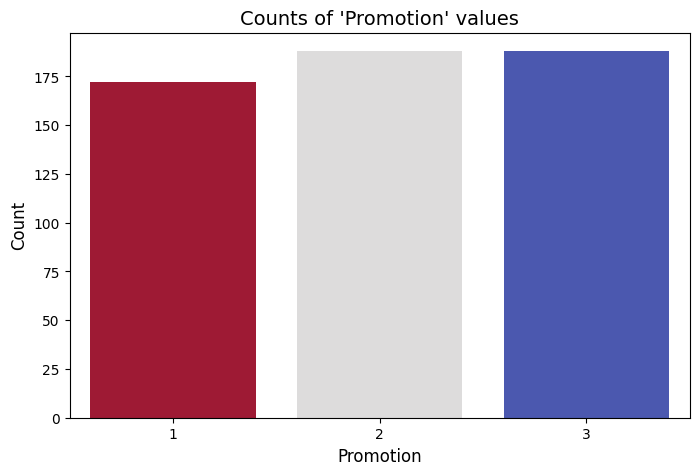

In [4]:
f.analyze_categorical_variable(df)

### First Look: Sales Performance and Promotional Strategies

_Let's visualize the sales data to get a feel for how the different promotional strategies might be performing._



The distributions of sales figures across the three promotions appear to be somewhat similar, with most sales falling within a specific range. However, there are some notable differences:

*   **Promotion 1** appears to have the highest median sales and the largest spread, indicating a higher potential for both high and low sales outcomes.
*   **Promotion 2** seems to have the lowest median sales and the smallest spread, suggesting more consistent but potentially lower sales outcomes.
*   **Promotion 3** falls in between the other two promotions in terms of both median sales and spread.

These initial observations suggest that the promotional strategies might have varying impacts on sales. However, we need to conduct statistical tests to determine if these differences are significant.

In [5]:
df.groupby('Promotion').agg({'SalesInThousands':['count','mean','sum']})

SalesInThousands                   
                     count    mean        sum
Promotion                                    
1                      172 58.0990  9993.0300
2                      188 47.3294  8897.9300
3                      188 55.3645 10408.5200

In [6]:
df.groupby(['MarketSize','Promotion']).agg({'SalesInThousands':['count','mean','sum']})

SalesInThousands                  
                                count    mean       sum
MarketSize Promotion                                   
Large      1                       56 75.2359 4213.2100
           2                       64 60.3220 3860.6100
           3                       48 77.2040 3705.7900
Medium     1                       96 47.6726 4576.5700
           2                      108 39.1144 4224.3500
           3                      116 45.4689 5274.3900
Small      1                       20 60.1625 1203.2500
           2                       16 50.8106  812.9700
           3                       24 59.5142 1428.3400

### Visualizing the Sales Showdown: Promotion vs. Performance

Time to see how these promotions stack up visually.  Let's craft a graph that pits them against each other, revealing any potential winners or losers in the sales arena. 


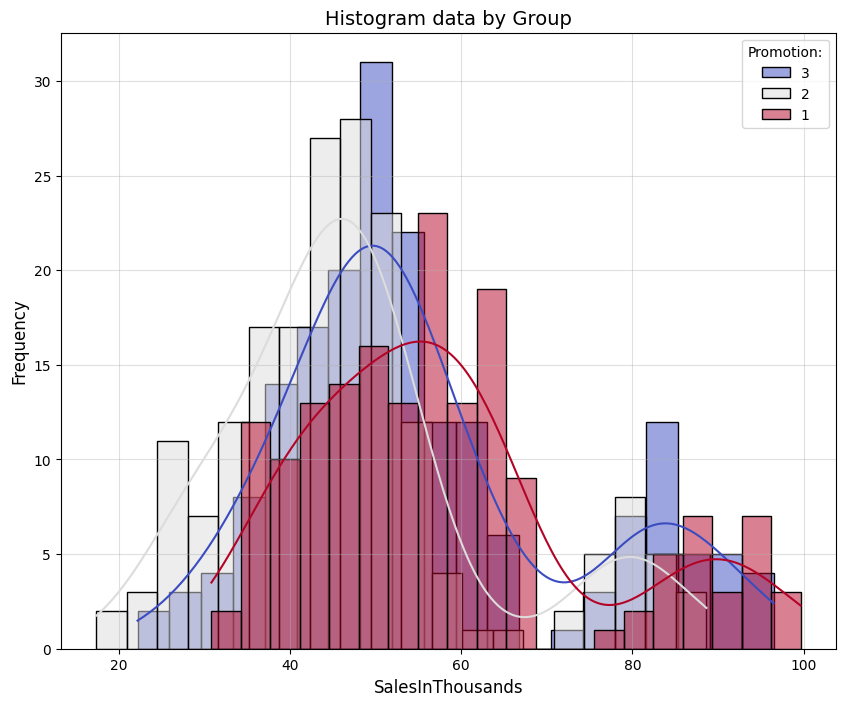

In [7]:
f.histogram_group(df)

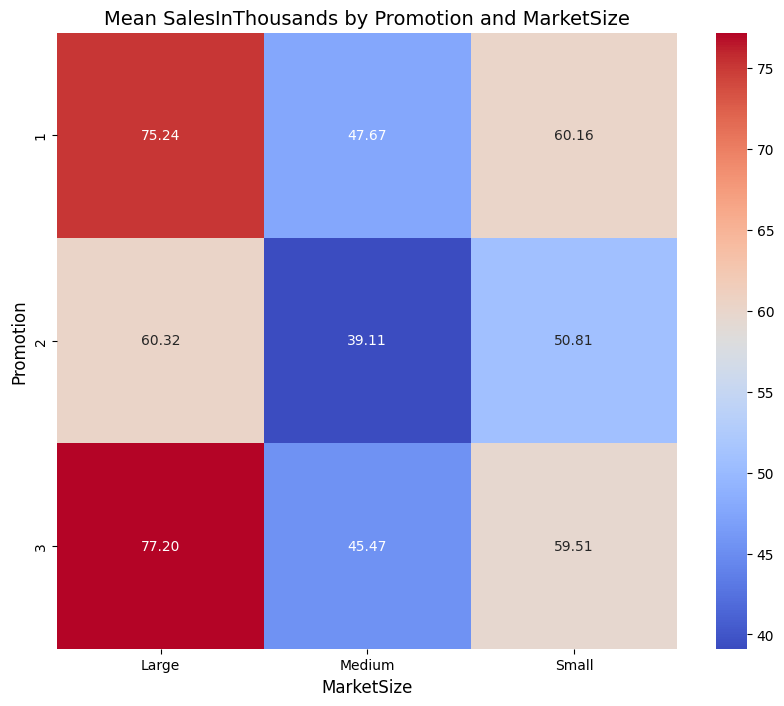

In [8]:
f.heatmap_mean_values(df)

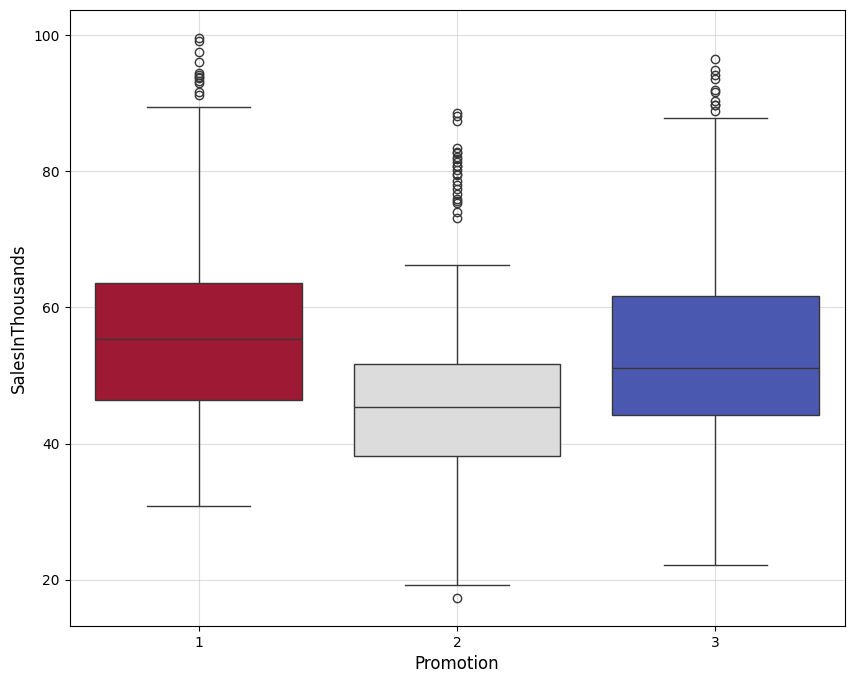

In [9]:
f.boxplot_group(df)

### Outlier Removal: A Necessary Sacrifice

To ensure the robustness of our analysis, we've identified and removed outliers from the `SalesInThousands` column. These extreme values could have skewed our results, so it's best to bid them farewell.


In [10]:
df_filtered = f.del_outliers(df)

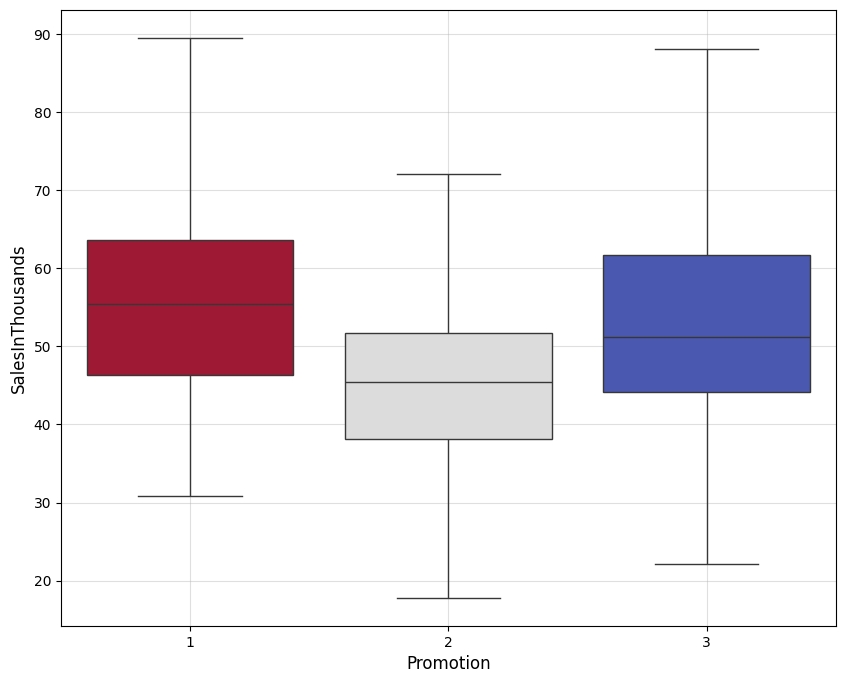

In [11]:
f.boxplot_group(df_filtered)

### Marketing Mayhem: Do Promotions Really Pack a Punch?

Let M1, M2, and M3 represent the mean sales for three different promotional strategies.

* **Null Hypothesis (H0):** M1 = M2 = M3 
   * Promotional strategies are mere smoke and mirrors, failing to charm the capricious consumer and leaving sales figures utterly unfazed.
* **Alternative Hypothesis (H1):** M1 ≠ M2 ≠ M3
   * But wait! Could certain promotions be the secret weapon, wielding the power to boost sales and send profits soaring?


### Q-Q Plots: A Visual Interrogation of Normality

_Let's subject our numerical suspects (`Promotion`, `SalesInThousands`, etc.) to the visual lineup of Q-Q plots and see if they can maintain their innocence in the face of the Normal Distribution._

If our data points align obediently along that diagonal line, we'll tip our hats to their conformity. But any deviations?  Well, that's where things get interesting – and potentially non-normal.


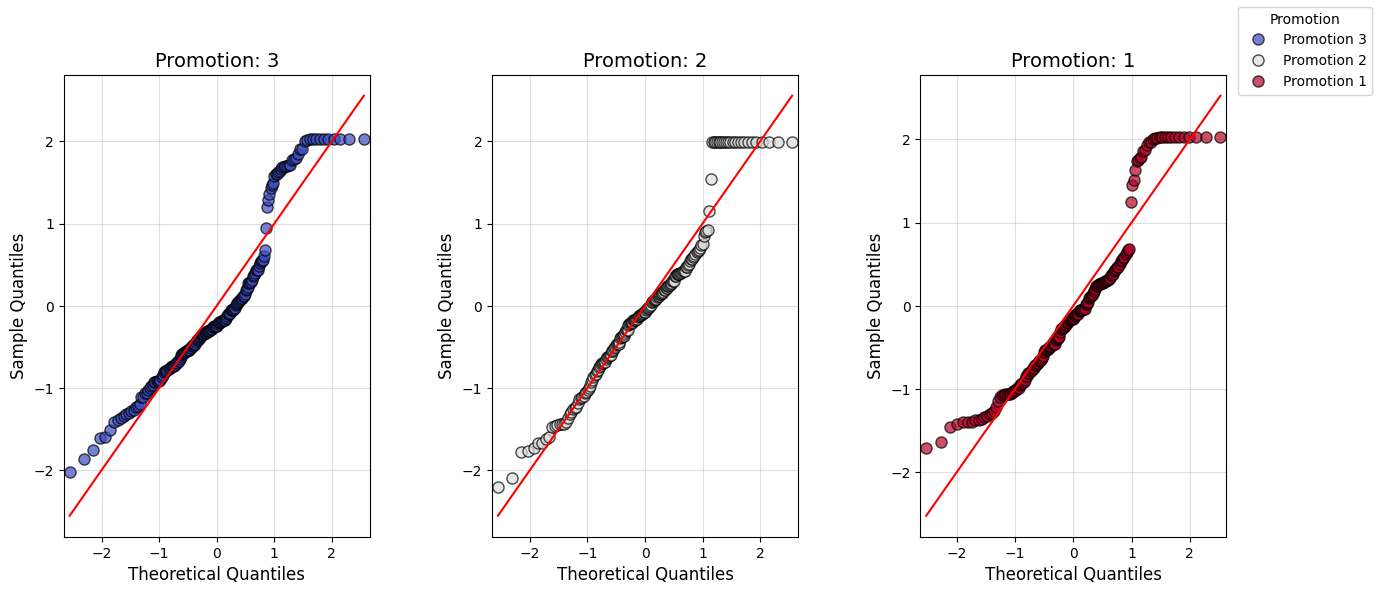

In [12]:
f.qq_plot_all(df_filtered)

### Normality Assumption: The Shapiro-Wilk Showdown

* **H0 (The 'Normal' Narrative):** Our data politely adheres to the bell curve's expectations, following the sacred tenets of the normal distribution. 
* **H1 (The 'Outlier' Uprising):** But hold on! Could our data be harboring a rebellious streak, deviating from normality's comforting embrace?

_The Shapiro-Wilk test shall be our judge, jury, and executioner (of assumptions). Let the statistical duel commence!_


In [13]:
f.shapiro_test(df_filtered)


Shapiro-Wilk Test Results:
-------------------------------------------------------
Promotion 3: W = 0.916, p-value = 0.0000000071
 H0 hypothesis rejected: Promotion 3 is likely not normal.

Promotion 2: W = 0.945, p-value = 0.0000012569
 H0 hypothesis rejected: Promotion 2 is likely not normal.

Promotion 1: W = 0.914, p-value = 0.0000000160
 H0 hypothesis rejected: Promotion 1 is likely not normal.



### Shapiro-Wilk Results: The Bell Curve Dream Dies a Swift Death

The Shapiro-Wilk test, our judge of normality, has delivered its verdict, and it's not pretty:

* **Promotion 1:** W = 0.914, p-value ≈ 0 (Rejection so swift, it barely registered on the statistical scale)
* **Promotion 2:** W = 0.945, p-value ≈ 0 (Another bell curve bites the dust)
* **Promotion 3:** W = 0.916, p-value ≈ 0 (Not even a glimmer of normality here)

Farewell, sweet normality! It seems all three promotion types have chosen the path of non-conformity. Our hopes of elegant parametric tests have been dashed.

_But fear not!  This is just a minor setback. We'll simply adjust our strategy and embrace the rugged charm of non-parametric methods._

Let's explore which statistical tests can handle this unruly data and still reveal its secrets!


In [14]:
f.kruskal_test(df_filtered)


Kruskal-Wallis Test Results:
-------------------------------------------------------
H-statistic: 55.4663, p-value: 0.0000
H0 hypothesis rejected: Significant differences between groups.


### Kruskal-Wallis Results:  A Statistical Smackdown

The Kruskal-Wallis test didn't hold back any punches:

* **H-statistic:** 55.4663
* **P-value:**  0.0000 (practically zero, folks)

Translation: There are **significant differences** in sales figures between the promotional groups. The null hypothesis has been knocked out cold!

In other words, your promotional strategies aren't all created equal. Some are clearly packing a more powerful punch than others when it comes to boosting sales. Time to dig deeper and figure out which promotions are the real champions! 


In [15]:
f.pairwise_test(df_filtered)


Pairwise Mann-Whitney U Test Results (with Bonferroni Correction):
-------------------------------------------------------------------
Promotion 3 vs. Promotion 2: U = 23452.0000, p-value (adjusted) = 0.0000
Promotion 3 vs. Promotion 1: U = 14000.0000, p-value (adjusted) = 0.0839
Promotion 2 vs. Promotion 1: U = 9319.0000, p-value (adjusted) = 0.0000


### Pairwise Mann-Whitney U Test Results: Battle Royale of the Promotions

With normality out the window, we turn to the trusty Mann-Whitney U test to compare our promotional gladiators in a pairwise showdown. After a Bonferroni correction to keep things fair (and statistically sound), here's the verdict:

| Promotion Matchup | U Statistic | Adjusted P-value | Outcome      |
| ----------------- | ----------- | ---------------- | ------------ |
| 3 vs. 2           | 23452.0000  | 0.0000           | Significant! |
| 3 vs. 1           | 14000.0000  | 0.0839           | Not Significant |
| 2 vs. 1           | 9319.0000   | 0.0000           | Significant! |

**Key Takeaways:**

* **Promotion 3 vs. Promotion 2:**  These two promotions are clearly in different leagues when it comes to sales.  We can confidently declare a significant difference between them.
* **Promotion 3 vs. Promotion 1:**  No clear winner here.  The difference in sales performance between these two is not statistically significant (at least after our Bonferroni adjustment).
* **Promotion 2 vs. Promotion 1:** Another knockout! Promotion 2 seems to have the upper hand over Promotion 1 in terms of driving sales.

**Future Directions:**

* **Deeper Dive into Promotion Characteristics:**  Analyze the specific features of each promotion (discount amount, duration, target audience, etc.) to identify what drives the observed differences in sales performance. 
* **Consider Effect Sizes:**  While statistical significance is important, quantifying the magnitude of the differences (e.g., using Cliff's delta) would provide a more practical understanding of the impact of each promotion.
* **Explore Interactions:**  Investigate whether the effectiveness of promotional strategies varies depending on other factors, such as customer demographics or seasonality.

These findings offer valuable insights for optimizing marketing efforts and maximizing sales potential.
